In [1]:
%matplotlib inline
import matplotlib.pyplot as plt  # type: ignore
import numpy as np
import numpy.typing as npt

from data.gaussian_classes import gaussian_class_data
from neural_network import NeuralNetwork

# np.set_printoptions(threshold=sys.maxsize)

In [2]:
means = [
    np.array([0.0, 0.0]),
    np.array([3.0, 3.0]),
    np.array([-3, 3]),
]
covariances = [
    np.array(
        [
            [1.0, 0.0],
            [0.0, 1.0],
        ]
    ),
    np.array(
        [
            [2.0, 0.0],
            [0.0, 2.0],
        ]
    ),
    np.array(
        [
            [1.0, 0.0],
            [0.0, 1.0],
        ]
    ),
]
data = gaussian_class_data(means, covariances, n_train=30, n_test=30)
class_1 = data.x_train[data.y_train[:, 0] == 1.0]
class_2 = data.x_train[data.y_train[:, 1] == 1.0]
class_3 = data.x_train[data.y_train[:, 2] == 1.0]

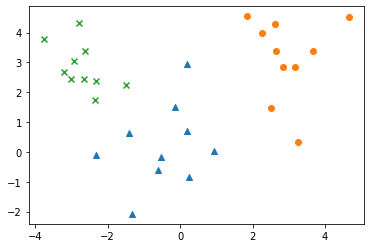

In [3]:
plt.scatter(class_1[:, 0], class_1[:, 1], marker="^")
plt.scatter(class_2[:, 0], class_2[:, 1], marker="o")
plt.scatter(class_3[:, 0], class_3[:, 1], marker="x")

Ws: [(10, 3), (3, 11)]
S: [[0.07666891 0.06518401 0.85814709]]
D: [ 0.07666891 -0.93481599  0.85814709]
S: [[1.04136105e-02 9.89167576e-01 4.18813531e-04]]
D: [-9.89586389e-01  9.89167576e-01  4.18813531e-04]
S: [[0.32480461 0.47239735 0.20279804]]
D: [-0.67519539  0.47239735  0.20279804]
S: [[1.76528561e-02 9.82227779e-01 1.19364634e-04]]
D: [ 0.01765286  0.98222778 -0.99988064]
S: [[0.23160735 0.69069052 0.07770212]]
D: [ 0.23160735  0.69069052 -0.92229788]
S: [[0.11769454 0.16767037 0.7146351 ]]
D: [ 0.11769454  0.16767037 -0.2853649 ]
S: [[0.08414513 0.11956608 0.79628879]]
D: [ 0.08414513  0.11956608 -0.20371121]
S: [[0.27433876 0.305014   0.42064725]]
D: [-0.72566124  0.305014    0.42064725]
S: [[2.49597725e-03 9.97391810e-01 1.12212427e-04]]
D: [ 0.00249598 -0.00260819  0.00011221]
S: [[0.36595588 0.32357883 0.31046529]]
D: [-0.63404412  0.32357883  0.31046529]
S: [[0.05472683 0.89708153 0.04819164]]
D: [-0.94527317  0.89708153  0.04819164]
S: [[9.50695484e-01 4.90574454e-02 2.4

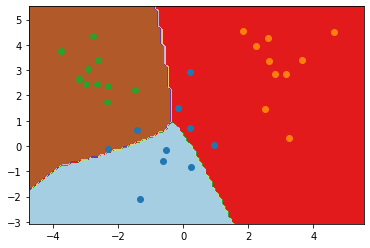

In [11]:
model = NeuralNetwork(
    hidden_units=[10], batch_size=1, learning_rate=0.1, max_iterations=1000
)
model.fit(data.x_train, data.y_train)

minx = data.x_train[:, 0].min() - 1
maxx = data.x_train[:, 0].max() + 1
miny = data.x_train[:, 1].min() - 1
maxy = data.x_train[:, 1].max() + 1
xrange = np.arange(minx, maxx, 0.1)
yrange = np.arange(miny, maxy, 0.1)
xx, yy = np.meshgrid(xrange, yrange)  # type: ignore
xx_flat = xx.flatten()
yy_flat = yy.flatten()
xx_flat = xx_flat.reshape((len(xx_flat), 1))
yy_flat = yy_flat.reshape((len(yy_flat), 1))
grid = np.hstack((xx_flat, yy_flat))
predictions = np.argmax(model.predict(grid), axis=1)

zz = predictions.reshape(xx.shape)
plt.contourf(xx, yy, zz, cmap="Paired")
for c in range(3):
    row_ix = np.where(data.y_train[:, c] == 1.0)
    plt.scatter(data.x_train[row_ix, 0], data.x_train[row_ix, 1], cmap="Paired")